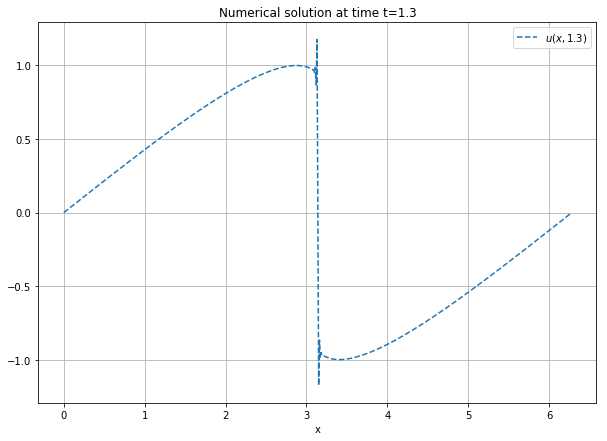

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi


def u0(x):
    return np.sin(x)


def f(u):
    return 0.5 * u ** 2


def modifiedLW(dx, dt, tf):
    a = 0
    b = 2 * pi
    nx = np.floor((b - a) / (dx)).astype(int)
    x = np.linspace(a, b, nx + 1)# x_0,...,x_N
    x = x[0:-1] #x_0,...,x_N-1 (N points)
    t = 0
    u = u0(x)
    while t < tf:
        dt = np.min([dt, tf - dt])
        c = dt / dx
        un = u.copy()
        u[0] = un[0] - (c / 2) * (f(un[1]) - f(un[nx - 1])) + (c ** 2) / 2 * (
                0.5 * (un[0] + un[1]) * (f(un[1]) - f(un[0])) - 0.5 * (un[0] + un[nx - 1]) * (f(un[0]) - f(un[nx - 1])))
        u[nx - 1] = un[nx - 1] - (c / 2) * (f(un[0]) - f(un[nx - 2])) + (c ** 2) / 2 * (
                0.5 * (un[nx - 1] + un[0]) * (f(un[0]) - f(un[nx - 1])) - 0.5 * (un[nx - 1] + un[nx - 2]) * (
                f(un[nx - 1]) - f(un[nx - 2])))
        for i in range(1, nx - 1):
            u[i] = un[i] - (c / 2) * (f(un[i + 1]) - f(un[i - 1])) + (c ** 2) / 2 * (
                    0.5 * (un[i] + un[i + 1]) * (f(un[i + 1]) - f(un[i])) - 0.5 * (un[i] + un[i - 1]) * (
                    f(un[i]) - f(un[i - 1])))

        t = t + dt

    return x, u



dx = 0.01
dt = 0.5 * dx
tf = 1.3


x, u = modifiedLW(dx, dt, tf)

plt.figure(figsize=(10, 7))
plt.plot(x, u, '--', markerfacecolor='none', label='$u(x,{})$'.format(tf))
plt.xlabel('x')
plt.legend()
plt.grid()
plt.title('Numerical solution at time t={}'.format(tf))
plt.show()


In [2]:
print(x)

[0.00000000e+00 5.00253607e-03 1.00050721e-02 ... 6.26817770e+00
 6.27318024e+00 6.27818277e+00]
